#Imersão Dados 3°Edição.
##### Alura (03 a 07 Maio 2021)
##### *por Luciana Lanzoni Menges*

######Imersão de Dados é um evento organizado pela Alura (www.alura.com.br), de uma semana, onde será mostrado de forma prática um projeto de ciência de dados do zero. Nesta edição serão explorados os dados de ***Drug Discovery***, que é o processo de descoberta de novos medicamentos por pesquisadores. 
Esse projeto foi inspirado em um desafio do Laboratory innovation science at Harvard disponibilizando os dados em uma competição no kaggle.
######Em cada uma das aulas diárias, além do conteúdo, são propostos desafios para serem resolvidos pelos participantes. 

###Dia 1
#####Na primeira aula é apresentado o Colab Notebook, algumas funcionalidades do Python e a biblioteca Pandas.

####Dados a serem analisados

#####A primeira tabela a ser analisada é "dados_experimentos", disponibilizada no seguinte [Repositório da Alura](https://github.com/alura-cursos/imersaodados3) no Github.


In [ ]:
import pandas as pd
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression='zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

####Desafios

#####Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?
#####Desafio 02: Plotar as 5 últimas linhas da tabela.
#####Desafio 03: Proporção das classes de tratamento. (Investigando a documentação do Pandas) (Referência do API)
#####Desafio 04: Quantas tipos de drogas foram investigadas?
#####Desafio 05: Procurar na documentação o método query(pandas).
#####Desafio 06: Renomear as colunas tirando o hífen. 
#####Desafio 07: Deixar os gráficos bonitões (Matplotlib.pyplot)
#####Desafio 08: Resumo do que vc aprendeu com os dados. 

##Resoluções

##Desafio 01
#### Investigar por que a classe tratamento é tão desbalanceada?

In [ ]:
dados['tratamento'].value_counts()


com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

#####O grupo controle não vai variar, ele se mantém com as mesmas condições. São 1.866 amostras de controle. 
#####O que altera são os experimentos, por isso que eles são em número maior, estão testando várias drogas. Ou seja foram 21.948 testes com drogas

##Desafio 02
####Plotar as 5 últimas linhas da tabela.

In [ ]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


###### Para ver as linhas iniciais. 

*É possível determinar quantas linhas devem ser mostradas, ao colocar o número que deseja entre os parenteses. (head ou tail)*

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


##Desafio 03
#### Proporção das classes de tratamento. (Investigando a documentação do Pandas) (Referência do API)

#####Resolvemos este item durante a aula. É necessário colocar um parâmetro a mais no .value_counts, o ***normalize***. O padrão no Pandas é *False*, ou seja valores absolutos. Quando eu indico o parâmetro como "normalize= True" o Pandas mostra as proporções ou invés das frequencias. 

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

##Desafio 04
####Quantos tipos de drogas foram investigadas?

In [ ]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
7a2ea4684       1
cf21e6ee0       1
d778ccd51       1
23458e56a       1
6e2b418c3       1
Name: droga, Length: 3289, dtype: int64

##### Foram usadas 3.289 drogas diferentes

In [ ]:
tipos_drogas = dados['droga'].value_counts()
tipos_drogas

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
7a2ea4684       1
cf21e6ee0       1
d778ccd51       1
23458e56a       1
6e2b418c3       1
Name: droga, Length: 3289, dtype: int64

In [ ]:
tipos_drogas[tipos_drogas > 100]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
Name: droga, dtype: int64

##### 9 drogas foram utilizadas em mais de 100 amostras cada uma. A droga mais utilizada foi a cacb2b860 em 1866 experimentos

In [ ]:
tipos_drogas[tipos_drogas < 50]

67c879e79    19
d488d031d    18
52d1e6f43    18
83a9ea167    18
a7c2673c1    14
             ..
7a2ea4684     1
cf21e6ee0     1
d778ccd51     1
23458e56a     1
6e2b418c3     1
Name: droga, Length: 3280, dtype: int64

##### 3.280 drogas foram utilizadas em menos de 19 experimentos cada uma.

##Desafio 05
###Procurar na documentação o método query(pandas).

A documentação do [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html?highlight=query#pandas.DataFrame.query) mostra que é possível consultar as colunas de um DataFrame com uma expressão booleana. Ou seja a expressão deve estar entre aspas. No exemplo abaixo a expressão é : droga == "d488d031d", será lida como uma consulta no SQL.

In [ ]:
dados.query('droga == "d488d031d"')
#Mostra todas os experimentos feitos com a droga chamada d488d031d.

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1367,id_0e437ad7f,com_droga,72,D1,d488d031d,0.1512,0.6465,1.1460,-0.2955,-0.8474,-0.2789,-0.0317,0.4250,-0.4102,0.9032,0.2406,-0.0506,0.2934,-0.4046,0.0517,0.2670,-0.2343,-1.4480,0.3575,0.5441,-0.4322,-0.5892,-0.1858,0.3079,-0.8811,0.6084,-0.8722,-0.6271,0.2105,0.4266,-1.0670,-0.2958,-0.7561,0.0534,0.5518,...,0.0147,-0.5146,-0.2703,-0.8091,-0.0748,-0.1931,-0.3784,-1.1190,0.2671,-0.9527,0.6871,-0.4230,-0.4099,-0.7850,-0.5464,-0.8492,-0.4547,-1.0160,-0.3264,0.1493,0.2655,-0.4373,-0.3862,0.5257,-0.9843,-0.3148,-0.5205,-0.1177,-0.5460,-0.0310,0.3275,-0.3380,-0.0226,-0.9575,-0.7528,-0.1840,-0.2052,-0.7133,-0.0615,-0.8563
4548,id_30f086bc6,com_droga,24,D1,d488d031d,-0.1956,0.3636,-0.0131,0.2749,-0.3698,1.5100,-0.6289,0.5321,-0.5342,0.0040,-0.2969,-0.0111,-0.7122,0.5890,-0.2058,-0.0536,0.4467,-1.5010,0.3875,0.0138,-0.2462,-0.1023,-0.5199,0.0000,0.7221,-1.8650,-0.0858,0.7329,-0.5024,0.0307,0.3822,-1.2020,0.7164,-0.6410,-0.7372,...,0.1865,-0.3514,0.2697,0.0684,-0.9937,0.2557,-0.1480,0.2756,0.4826,-0.2224,-0.5335,-1.2470,0.0773,-0.1349,0.3491,-0.7630,-0.4369,-1.0040,-0.9101,0.0479,0.2071,0.4229,-0.0932,-0.2324,-0.5410,0.4814,0.2210,0.7450,0.4550,0.6246,-0.2890,-0.2829,-1.5690,-1.1130,0.3249,0.1912,-0.0842,0.2650,0.2893,0.5154
9199,id_62bae469b,com_droga,48,D1,d488d031d,-0.0250,-0.1837,1.4060,-0.1514,0.3239,0.8639,0.0013,0.0848,-0.4292,-1.6220,0.7592,-0.5249,-0.4757,-1.0300,-0.2338,0.6362,-0.2688,-0.1778,0.3393,0.2258,-0.7638,-0.4819,-0.4340,0.0000,-0.0953,0.4360,0.0635,0.4638,-0.3490,-0.0176,0.6121,0.0317,-0.1472,0.0273,0.6999,...,0.4050,0.0845,0.0216,0.5887,-0.0566,0.2303,0.7368,1.1880,-0.8640,-0.0091,0.7547,0.1665,0.1043,0.0675,-0.6961,0.4951,0.0277,1.0010,-0.3195,-0.0647,-0.1258,-0.1043,0.4284,0.3020,0.4380,0.7495,0.7236,0.2133,-0.3100,-0.1367,-0.2076,0.8630,0.3259,-0.9744,0.0180,-0.1287,0.8442,-0.1409,0.5158,0.5530
9956,id_6b46fba39,com_droga,48,D2,d488d031d,-0.0745,-1.0390,3.1900,-0.0948,0.1701,0.6575,0.4796,0.3694,-0.9487,0.6547,-0.2299,-0.4024,-0.3754,-0.5937,-0.5689,0.3855,0.3988,-0.7875,0.2148,0.3977,0.7446,-0.1793,-0.8421,-0.3311,0.0392,0.9363,0.4295,-1.2600,-0.8927,0.2072,-0.6900,1.8260,-0.6090,-0.5022,0.3725,...,1.0580,0.4615,0.6247,0.7400,-0.0823,0.5213,-0.4296,0.4042,-0.3974,0.4213,0.3677,0.2885,1.3720,0.0221,-0.0469,0.5446,-0.7294,0.1102,0.8699,0.1527,0.6744,0.7717,0.6070,0.1786,1.0850,0.9616,-0.1847,-0.3974,-0.7139,0.0174,0.1265,-0.6017,0.1093,0.8821,0.7442,0.8584,0.3251,0.2124,1.1340,0.5402
11879,id_7fe8361f7,com_droga,48,D2,d488d031d,-0.9213,-0.6053,-0.4482,0.2030,-0.1132,-0.0215,0.4718,-0.1577,-0.2009,-0.4647,-0.6696,-0.3861,-0.1893,0.4140,0.4900,0.9224,0.4549,-1.5950,0.2667,0.0371,0.7279,0.3602,0.0978,-0.3292,-0.8752,0.3763,0.4983,0.2584,-0.1515,1.4030,-0.5927,0.6691,-0.2521,0.9984,0.5547,...,0.8098,1.0520,0.2868,0.5073,0.3880,-0.5073,0.3477,-0.2855,-0.2018,0.9088,0.9896,1.5440,1.2120,0.0996,0.9252,0.2034,0.0234,0.8509,0.5799,0.8426,1.2730,-0.2931,1.1510,-0.0050,0.9966,-0.0730,-0.4091,-0.0257,0.8986,-0.7140,0.7660,0.4187,-0.1109,0.1611,0.9590,0.4419,0.4486,0.2846,0.7675,0.5362
12167,id_82fa51deb,com_droga,48,D2,d488d031d,-0.1355,-0.5617,0.2821,-0.1418,-0.5290,0.6524,0.1394,1.3480,-0.3465,-0.0994,0.5224,-0.7092,0.1856,-0.0014,0.4654,0.1734,1.4390,-3.5680,-1.3260,-0.2097,0.1195,-0.5616,0.4944,0.5979,1.2660,0.4106,0.6496,0.6933,-0.1990,0.1324,0.1605,0.2290,0.1675,-0.6507,0.0661,...,-0.1843,-1.1010,0.4582,-0.3374,-0.7348,-0.1216,0.5711,-0.3948,-0.1669,-0.1420,-0.5699,0.9272,0.2207,0.3454,-0.0504,-0.7064,0.9771,-0.1787,0.3232,0.5874,-1.4140,-0.3784,-0.1273,0.5767,0.9154,-0.8787,0.8240,-0.5106,-0.2790,0.1103,-0.7932,0.0423,-0.488

In [ ]:
dados.query('droga == "d488d031d" and dose == "D1"')
#É possível colocar mais de um parâmetro junto. Mostra os experimentos da droga "d488d031d" e dose "D1"

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1367,id_0e437ad7f,com_droga,72,D1,d488d031d,0.1512,0.6465,1.1460,-0.2955,-0.8474,-0.2789,-0.0317,0.4250,-0.4102,0.9032,0.2406,-0.0506,0.2934,-0.4046,0.0517,0.2670,-0.2343,-1.4480,0.3575,0.5441,-0.4322,-0.5892,-0.1858,0.3079,-0.8811,0.6084,-0.8722,-0.6271,0.2105,0.4266,-1.0670,-0.2958,-0.7561,0.0534,0.5518,...,0.0147,-0.5146,-0.2703,-0.8091,-0.0748,-0.1931,-0.3784,-1.1190,0.2671,-0.9527,0.6871,-0.4230,-0.4099,-0.7850,-0.5464,-0.8492,-0.4547,-1.0160,-0.3264,0.1493,0.2655,-0.4373,-0.3862,0.5257,-0.9843,-0.3148,-0.5205,-0.1177,-0.5460,-0.0310,0.3275,-0.3380,-0.0226,-0.9575,-0.7528,-0.1840,-0.2052,-0.7133,-0.0615,-0.8563
4548,id_30f086bc6,com_droga,24,D1,d488d031d,-0.1956,0.3636,-0.0131,0.2749,-0.3698,1.5100,-0.6289,0.5321,-0.5342,0.0040,-0.2969,-0.0111,-0.7122,0.5890,-0.2058,-0.0536,0.4467,-1.5010,0.3875,0.0138,-0.2462,-0.1023,-0.5199,0.0000,0.7221,-1.8650,-0.0858,0.7329,-0.5024,0.0307,0.3822,-1.2020,0.7164,-0.6410,-0.7372,...,0.1865,-0.3514,0.2697,0.0684,-0.9937,0.2557,-0.1480,0.2756,0.4826,-0.2224,-0.5335,-1.2470,0.0773,-0.1349,0.3491,-0.7630,-0.4369,-1.0040,-0.9101,0.0479,0.2071,0.4229,-0.0932,-0.2324,-0.5410,0.4814,0.2210,0.7450,0.4550,0.6246,-0.2890,-0.2829,-1.5690,-1.1130,0.3249,0.1912,-0.0842,0.2650,0.2893,0.5154
9199,id_62bae469b,com_droga,48,D1,d488d031d,-0.0250,-0.1837,1.4060,-0.1514,0.3239,0.8639,0.0013,0.0848,-0.4292,-1.6220,0.7592,-0.5249,-0.4757,-1.0300,-0.2338,0.6362,-0.2688,-0.1778,0.3393,0.2258,-0.7638,-0.4819,-0.4340,0.0000,-0.0953,0.4360,0.0635,0.4638,-0.3490,-0.0176,0.6121,0.0317,-0.1472,0.0273,0.6999,...,0.4050,0.0845,0.0216,0.5887,-0.0566,0.2303,0.7368,1.1880,-0.8640,-0.0091,0.7547,0.1665,0.1043,0.0675,-0.6961,0.4951,0.0277,1.0010,-0.3195,-0.0647,-0.1258,-0.1043,0.4284,0.3020,0.4380,0.7495,0.7236,0.2133,-0.3100,-0.1367,-0.2076,0.8630,0.3259,-0.9744,0.0180,-0.1287,0.8442,-0.1409,0.5158,0.5530
12206,id_8377d00b0,com_droga,24,D1,d488d031d,-0.0367,-1.0710,-0.3938,-0.9780,0.3557,0.9395,-0.1716,0.7442,-1.1340,-0.3495,-0.3629,-1.1700,-0.7848,0.6739,0.2457,-0.7990,0.4770,-0.7621,0.4206,0.0000,-1.4520,0.5099,-0.2073,0.3712,0.9223,-1.0350,-0.5599,-0.3196,-0.0111,-0.5588,-0.3966,-1.1140,0.1323,0.2860,-0.6111,...,-0.0866,-2.0750,-0.3840,-0.9499,0.3467,0.3043,-0.0741,0.1946,-1.0010,0.2046,-0.1333,0.0286,0.0010,1.4290,0.3294,-0.3378,-1.0540,-0.2002,0.4129,0.2345,0.1604,-0.3584,-0.7919,-0.0751,0.6468,-0.2087,0.7658,-0.8371,0.2612,-1.1720,-1.1220,-0.3870,0.2985,-0.5659,0.6821,0.7913,0.2751,-0.6468,0.0621,-0.0196
13343,id_8fbaa22b1,com_droga,48,D1,d488d031d,-1.3860,0.0260,-0.9534,-0.1252,-0.0512,1.0110,-0.9042,0.2121,-1.4800,0.1610,0.4277,0.3764,-0.5635,0.0171,-1.1160,0.5588,-0.2041,-4.6630,0.7696,0.3474,0.5923,0.6008,0.4770,0.0000,-0.0871,-0.3931,0.5513,-2.0700,-1.0260,-2.1800,-0.7556,-0.2883,0.3909,0.3295,-0.1453,...,0.1185,0.2886,-0.2161,-1.2000,-0.3246,-0.5501,-0.0643,-0.0961,0.6038,1.2900,-0.3275,0.8326,-0.0285,0.6557,0.9162,0.2895,-0.3231,-0.1774,-0.6890,-0.4794,0.3780,0.5496,-0.1537,-0.0817,0.4453,-0.2545,1.1380,-0.0275,-0.0302,-0.1764,-0.3583,-0.1272,-0.4737,0.1040,0.2357,0.6383,1.2880,-0.6674,-0.1059,-0.0780
14128,id_9840327f0,com_droga,72,D1,d488d031d,-1.5970,0.2551,-1.1590,-0.3656,-0.5812,-0.5671,-0.3519,-0.0184,0.7629,0.5257,0.2560,3.0000,-1.9920,-1.0080,-2.2940,1.1840,0.0210,1.5730,-0.1588,0.6502,0.9513,-0.5244,-0.6652,-0.9209,0.7379,-1.3480,0.4017,-0.1690,-1.0500,-2.7860,-0.8303,-0.7049,-0.0236,1.1090,-0.5758,...,-0.4360,-0.4053,-1.2820,-1.2240,-1.8340,-1.8970,-0.5560,-0.6379,-0.2464,-0.0736,-0.5110,-0.6016,-0.2964,-0.5511,-0.6034,-0.3187,-0.6186,-1.7300,-0.1338,-1.9740,-0.8930,-0.8739,-1.2640,-0.2036,-0.7168,-0.5703,-

##Desafio 06
###Renomear as colunas tirando o hífen.

In [ ]:
dados.columns
#Nomes das colunas na tabela original com hífen

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=877)

In [ ]:
Nomes_colunas = dados.columns.str.replace('-','')
dados.columns = Nomes_colunas
dados.head()
#Retirado o hífen do nome das colunas.


,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


##Desafio 07
###Deixar os gráficos bonitões (Matplotlib.pyplot)

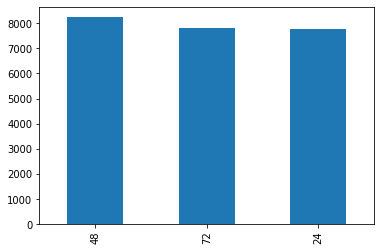

In [ ]:
dados['tempo'].value_counts().plot.bar()
#Gráfico solicitado

In [ ]:
import matplotlib.pyplot as plt

#####Gráfico remodelado

Text(0, 0.5, 'Tempo em horas')

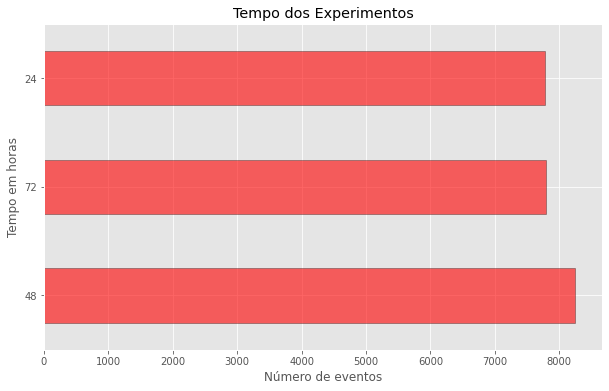

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (10, 6))
dados['tempo'].value_counts().plot.barh(ec = "k", alpha = .6, color = "red")
plt.title('Tempo dos Experimentos')
plt.xlabel("Número de eventos")
plt.ylabel("Tempo em horas")

##Desafio 08
###Resumo do que vc aprendeu com os dados.


- Com estas análises podemos já concluir que 3.289 drogas foram testadas, porém com apenas nove delas foram feitos mais experimentos. 
- O grupo de controle foi pequeno em relação ao número total dos experimentos.
- Os valores min e max têm uma grande variação para cada gene (coluna)
- Não há informações claras, mas pode se imaginar que quase todos os experimentos foram feitos com duas doses, porque a diferença entre D1 e D2 é de apenas 2%


In [ ]:
dados.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

In [ ]:
dados['dose'].value_counts(normalize=True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64